In [1]:
#import dependencies
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import time
import requests
import io
import os
import matplotlib.pyplot as plt

# Import ESG Data from CSV

In [2]:
# Import the CSV
file_to_load = os.path.join("Resources", "latest_esg_details.csv")
Stocks_with_ESG = pd.read_csv(file_to_load)
Stocks_with_ESG
                            

,TICKER,Total-Score,E-Score,S-Score,G-Score,Last Rated,ESG Performance,peer Group,Highest Controversy,peer Count,...,min peer Social,avg peer Social,max peer Social,min peer Governance,avg peer Governance,max peer Governance,min Highest Controversy,avg Highest Controversy,max Highest Controversy,Controversial Business Areas
0,INTC,16.9,4.4,5.6,6.9,2022-02-01,UNDER_PERF,Semiconductors,3.0,31,...,2.62,6.166333,9.51,4.79,6.668667,9.67,0.0,1.129032,4.0,None
1,MSFT,13.3,0.5,8.1,4.7,2022-02-01,UNDER_PERF,Software & Services,3.0,105,...,3.90,9.897476,21.01,3.83,7.004078,34.36,0.0,1.561905,5.0,None
2,CRM,13.3,2.3,6.5,4.4,2022-02-01,UNDER_PERF,Software & Services,2.0,105,...,3.90,9.897476,21.01,3.83,7.004078,34.36,0.0,1.561905,5.0,None
3,BAC,27.3,1.6,14.4,11.3,2022-02-01,AVG_PERF,Banks,3.0,175,...,3.82,11.263174,18.49,5.73,11.505210,18.70,0.0,2.125714,5.0,None
4,PYPL,16.4,0.7,9.9,5.8,2022-02-01,UNDER_PERF,Software & Services,2.0,105,...,3.90,9.897476,21.01,3.83,7.004078,34.36,0.0,1.561905,5.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,COF,23.2,0.1,13.5,9.7,2022-02-01,AVG_PERF,Diversified Financials,4.0,89,...,1.28,8.416512,16.34,5.03,9.722558,17.52,0.0,1.573034,4.0,None
85,BBY,14.3,2.2,7.3,4.8,2022-02-01,UNDER_PERF,Retailing,2.0,57,...,3.96,7.575490,14.25,2.73,5.574706,9.84,0.0,1.912281,3.0,None
86,KMB,22.2,8.1,7.8,6.4,2022-02-01,AVG_PERF,Household Products,2.0,28,...,4.89,8.524643,12.38,5.64,7.498571,9.88,0.0,1.821429,3.0,"Animal Testing,"
87,EMN,24.8,11.5,5.5,7.8,2022-02-01,AVG_PERF,Chemicals,2.0,77,...,0.89,6.192237,13.81,3.38,7.630263,10.92,0.0,1.597403,4.0,"Animal Testing,"


In [3]:
# To find the type of data
Stocks_with_ESG.dtypes

TICKER                           object
Total-Score                     float64
E-Score                         float64
S-Score                         float64
G-Score                         float64
Last Rated                       object
ESG Performance                  object
peer Group                       object
Highest Controversy             float64
peer Count                        int64
total Percentile                float64
related Controversy              object
min peer ESG                    float64
avg peer ESG                    float64
max peer ESG                    float64
min peer Environment            float64
avg peer Environment            float64
max peer Environment            float64
min peer Social                 float64
avg peer Social                 float64
max peer Social                 float64
min peer Governance             float64
avg peer Governance             float64
max peer Governance             float64
min Highest Controversy         float64


# Stock Price Analysis

### Stocc Price = Valuation + Investor Confidences


Many factors can influence investor confidence, and ESG is most and one of the biggest reasons to influence the investor's confidence. In this model, we assume the ESG score is the only reason to affect investor confidence. Then, I will use three methods to get the valuation: Price to Sale and price to earnings (comparable industry methods) and Discounted Dividend Method.


Then, MV Price - valuation = Investor Confidence


In the end, we will find the suitest one to test and train.

## P/E  and P/S valution 

In [4]:
# Import the CSV
file_to_load = os.path.join("Resources", "latest_stocks_details.csv")
df = pd.read_csv(file_to_load)
df

,TICKER,longName,sector,industry,city,state,country,fullTimeEmployees,revenueGrowth,forwardEps,...,bookValue,returnOnAssets,returnOnEquity,averageVolume,volume,currentPrice,fiftyTwoWeekLow,fiftyTwoWeekHigh,regularMarketPrice,marketCap
0,INTC,Intel Corporation,Technology,Semiconductors,Santa Clara,CA,United States,121100.0,0.028,3.72,...,23.438,0.08586,0.22522,39052237,51568578,51.62,43.63,68.49,51.62,2.101966e+11
1,MSFT,Microsoft Corporation,Technology,Software—Infrastructure,Redmond,WA,United States,181000.0,0.201,10.75,...,21.335,0.15249,0.49051,37619678,22702420,304.10,231.10,349.67,304.10,2.279798e+12
2,CRM,"salesforce.com, inc.",Technology,Software—Application,San Francisco,CA,United States,73541.0,0.259,5.77,...,58.778,0.00466,0.02899,7411798,4047474,213.98,184.44,311.75,213.98,2.118402e+11
3,BAC,Bank of America Corporation,Financial Services,Banks—Diversified,Charlotte,NC,United States,208000.0,0.125,3.84,...,30.374,0.01068,0.11778,55111557,30288450,43.07,36.51,50.11,43.07,3.473535e+11
4,PYPL,"PayPal Holdings, Inc.",Financial Services,Credit Services,San Jose,CA,United States,26500.0,0.132,5.27,...,18.816,0.03811,0.24300,22059324,13099584,116.05,92.25,310.16,116.05,1.363506e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,COF,Capital One Financial Corporation,Financial Services,Credit Services,McLean,VA,United States,50800.0,0.159,19.31,...,133.911,0.02959,0.20556,2995114,1883792,135.07,121.44,177.95,135.07,5.748877e+10
85,BBY,"Best Buy Co., Inc.",Consumer Cyclical,Specialty Retail,Richfield,MN,United States,61200.0,0.005,9.23,...,17.547,0.10162,0.63223,3232578,1849004,96.71,85.58,141.97,96.71,2.326465e+10
86,KMB,Kimberly-Clark Corporation,Consumer Defensive,Household & Personal Products,Dallas,TX,United States,45000.0,0.027,6.75,...,1.408,0.10050,2.29639,1993532,2818107,120.09,117.32,145.79,120.09,4.043634e+10
87,EMN,Eastman Chemical Company,Basic Materials,Chemicals,Kingsport,TN,United States,14500.0,0.282,9.56,...,45.522,0.05295,0.08428,1281426,985443,110.64,98.24,130.47,110.64,1.487444e+10


In [5]:
# Get average P/S dataframe
average_df=df.groupby('industry').mean()
ps_average_df=average_df.filter(['priceToSalesTrailing12Months','industry'], axis=1)
ps_average_df

,priceToSalesTrailing12Months
industry,
Aerospace & Defense,1.927607
Airlines,0.977253
Asset Management,5.982998
Auto Manufacturers,0.500145
Banks—Diversified,2.767986
Banks—Regional,3.136520
Beverages—Non-Alcoholic,2.863025
Building Products & Equipment,1.124844
Capital Markets,1.901579


In [6]:
# Get average P/E dataframe
average_df=df.groupby('industry').mean()
pe_average_df=average_df.filter(['trailingPE','industry'], axis=1)
pe_average_df

,trailingPE
industry,
Aerospace & Defense,18.375255
Airlines,0.000000
Asset Management,19.631453
Auto Manufacturers,14.769990
Banks—Diversified,9.638089
Banks—Regional,8.579992
Beverages—Non-Alcoholic,29.958107
Building Products & Equipment,9.837837
Capital Markets,5.545605


In [7]:
#Merge the industried average to CSV
stock_df = pd.merge(df, ps_average_df,on='industry',suffixes=['','_In_Average'])
stock_df = pd.merge(stock_df, pe_average_df,on='industry',suffixes=['','_In_Average'])
stock_df

,TICKER,longName,sector,industry,city,state,country,fullTimeEmployees,revenueGrowth,forwardEps,...,returnOnEquity,averageVolume,volume,currentPrice,fiftyTwoWeekLow,fiftyTwoWeekHigh,regularMarketPrice,marketCap,priceToSalesTrailing12Months_In_Average,trailingPE_In_Average
0,INTC,Intel Corporation,Technology,Semiconductors,Santa Clara,CA,United States,121100.0,0.028,3.72,...,0.22522,39052237,51568578,51.62,43.63,68.49,51.62,2.101966e+11,12.161333,39.186145
1,NVDA,NVIDIA Corporation,Technology,Semiconductors,Santa Clara,CA,United States,18975.0,0.503,5.21,...,0.41940,51397157,87517626,281.50,122.72,346.47,281.50,7.014980e+11,12.161333,39.186145
2,QCOM,QUALCOMM Incorporated,Technology,Semiconductors,San Diego,CA,United States,45000.0,0.300,11.64,...,1.06739,10710686,9252439,158.46,122.17,193.58,158.46,1.774752e+11,12.161333,39.186145
3,MSFT,Microsoft Corporation,Technology,Software—Infrastructure,Redmond,WA,United States,181000.0,0.201,10.75,...,0.49051,37619678,22702420,304.10,231.10,349.67,304.10,2.279798e+12,9.500720,26.460872
4,ADBE,Adobe Inc.,Technology,Software—Infrastructure,San Jose,CA,United States,0.0,0.200,16.25,...,0.34368,3887824,5506320,432.14,407.94,699.54,432.14,2.056122e+11,9.500720,26.460872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,ECL,Ecolab Inc.,Basic Materials,Specialty Chemicals,Saint Paul,MN,United States,44000.0,0.100,5.97,...,0.17579,1594052,1584710,176.26,154.85,238.93,176.26,5.051030e+10,4.062338,45.067757
85,DLR,"Digital Realty Trust, Inc.",Real Estate,REIT—Office,Austin,TX,United States,3030.0,0.009,1.55,...,0.09442,1648621,686511,137.65,130.10,178.22,137.65,3.906328e+10,8.825536,58.055668
86,TT,Trane Technologies plc,Industrials,Specialty Industrial Machinery,Swords,0,Ireland,35000.0,0.064,6.98,...,0.21421,1630086,925447,154.73,142.53,207.06,154.73,3.675456e+10,2.673798,27.819130
87,BBY,"Best Buy Co., Inc.",Consumer Cyclical,Specialty Retail,Richfield,MN,United States,61200.0,0.005,9.23,...,0.63223,3232578,1849004,96.71,85.58,141.97,96.71,2.326465e+10,0.444550,9.350285


In [8]:
# rename columns of the P/E and P/S name 
stock_df = stock_df.rename(columns={'priceToSalesTrailing12Months_In_Average': 'P/S_in_Average', 'trailingPE_In_Average': 'P/E_in_Average','currentPrice':'Mv Price',
                                   'priceToSalesTrailing12Months': 'P/S', 'trailingPE': 'P/E'})



stock_df

,TICKER,longName,sector,industry,city,state,country,fullTimeEmployees,revenueGrowth,forwardEps,...,returnOnEquity,averageVolume,volume,Mv Price,fiftyTwoWeekLow,fiftyTwoWeekHigh,regularMarketPrice,marketCap,P/S_in_Average,P/E_in_Average
0,INTC,Intel Corporation,Technology,Semiconductors,Santa Clara,CA,United States,121100.0,0.028,3.72,...,0.22522,39052237,51568578,51.62,43.63,68.49,51.62,2.101966e+11,12.161333,39.186145
1,NVDA,NVIDIA Corporation,Technology,Semiconductors,Santa Clara,CA,United States,18975.0,0.503,5.21,...,0.41940,51397157,87517626,281.50,122.72,346.47,281.50,7.014980e+11,12.161333,39.186145
2,QCOM,QUALCOMM Incorporated,Technology,Semiconductors,San Diego,CA,United States,45000.0,0.300,11.64,...,1.06739,10710686,9252439,158.46,122.17,193.58,158.46,1.774752e+11,12.161333,39.186145
3,MSFT,Microsoft Corporation,Technology,Software—Infrastructure,Redmond,WA,United States,181000.0,0.201,10.75,...,0.49051,37619678,22702420,304.10,231.10,349.67,304.10,2.279798e+12,9.500720,26.460872
4,ADBE,Adobe Inc.,Technology,Software—Infrastructure,San Jose,CA,United States,0.0,0.200,16.25,...,0.34368,3887824,5506320,432.14,407.94,699.54,432.14,2.056122e+11,9.500720,26.460872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,ECL,Ecolab Inc.,Basic Materials,Specialty Chemicals,Saint Paul,MN,United States,44000.0,0.100,5.97,...,0.17579,1594052,1584710,176.26,154.85,238.93,176.26,5.051030e+10,4.062338,45.067757
85,DLR,"Digital Realty Trust, Inc.",Real Estate,REIT—Office,Austin,TX,United States,3030.0,0.009,1.55,...,0.09442,1648621,686511,137.65,130.10,178.22,137.65,3.906328e+10,8.825536,58.055668
86,TT,Trane Technologies plc,Industrials,Specialty Industrial Machinery,Swords,0,Ireland,35000.0,0.064,6.98,...,0.21421,1630086,925447,154.73,142.53,207.06,154.73,3.675456e+10,2.673798,27.819130
87,BBY,"Best Buy Co., Inc.",Consumer Cyclical,Specialty Retail,Richfield,MN,United States,61200.0,0.005,9.23,...,0.63223,3232578,1849004,96.71,85.58,141.97,96.71,2.326465e+10,0.444550,9.350285


In [9]:
# filter the columns that we need 
No1_stock_df=stock_df.filter(['TICKER','longName','P/E_in_Average','P/S_in_Average','industry','P/E','P/S', 'Mv Price'], axis=1)
No1_stock_df.head(10)

,TICKER,longName,P/E_in_Average,P/S_in_Average,industry,P/E,P/S,Mv Price
0,INTC,Intel Corporation,39.186145,12.161333,Semiconductors,10.621399,2.659909,51.62
1,NVDA,NVIDIA Corporation,39.186145,12.161333,Semiconductors,86.802345,28.899150,281.50
2,QCOM,QUALCOMM Incorporated,39.186145,12.161333,Semiconductors,20.134690,4.924942,158.46
3,MSFT,Microsoft Corporation,26.460872,9.500720,Software—Infrastructure,32.388966,12.329699,304.10
4,ADBE,Adobe Inc.,26.460872,9.500720,Software—Infrastructure,43.127743,13.025798,432.14
5,AKAM,"Akamai Technologies, Inc.",26.460872,9.500720,Software—Infrastructure,32.238396,5.605835,117.38
6,VMW,"VMware, Inc.",26.460872,9.500720,Software—Infrastructure,24.549257,3.904846,117.37
7,PANW,"Palo Alto Networks, Inc.",26.460872,9.500720,Software—Infrastructure,0.000000,12.637424,622.16
8,CRM,"salesforce.com, inc.",700.104558,13.499923,Software—Application,144.581070,7.996383,213.98
9,INTU,Intuit Inc.,700.104558,13.499923,Software—Application,61.420660,12.779981,465.63


## P/E Branch Analysis

In [10]:
 #Use P/E to compare the average

# Get % rate difference between P/E of stock and P/E of industry
PE_rate=(No1_stock_df['P/E_in_Average']-No1_stock_df['P/E'])/No1_stock_df['P/E']


In [11]:

# Use the P/E valuation to get the stock price
PE_valuation_Stock_Price=(1+PE_rate)*No1_stock_df['P/E_in_Average']
PE_valuation_Stock_Price.head(10)

0     144.571721
1      17.690236
2      76.264096
3      21.617787
4      16.234974
5      21.718753
6      28.521343
7            inf
8    3390.114566
9    7980.155072
dtype: float64

In [12]:
# Get Difference bewteen MV Price
Diff_PE=stock_df['Mv Price']-PE_valuation_Stock_Price
Diff_PE.head(10)

0     -92.951721
1     263.809764
2      82.195904
3     282.482213
4     415.905026
5      95.661247
6      88.848657
7           -inf
8   -3176.134566
9   -7514.525072
dtype: float64

In [13]:
# Create Dataframe for P/E valuation, Market value price and difference
pe_df=pd.DataFrame({"Predicted Price": PE_valuation_Stock_Price, "Mv Price": stock_df['Mv Price'], "Difference": Diff_PE,"ESG":Stocks_with_ESG["Total-Score"]})[["Predicted Price", "Mv Price", "Difference","ESG"]]
pe_df.head(10)


,Predicted Price,Mv Price,Difference,ESG
0,144.571721,51.62,-92.951721,16.9
1,17.690236,281.50,263.809764,13.3
2,76.264096,158.46,82.195904,13.3
3,21.617787,304.10,282.482213,27.3
4,16.234974,432.14,415.905026,16.4
5,21.718753,117.38,95.661247,16.3
6,28.521343,117.37,88.848657,12.8
7,inf,622.16,-inf,16.7
8,3390.114566,213.98,-3176.134566,11.8
9,7980.155072,465.63,-7514.525072,24.4


In [14]:
# Delete the nan and inf value
pe_df=pe_df.replace([np.inf, -np.inf], np.nan)
pe_df=pe_df.dropna()
pe_df

,Predicted Price,Mv Price,Difference,ESG
0,144.571721,51.62,-92.951721,16.9
1,17.690236,281.50,263.809764,13.3
2,76.264096,158.46,82.195904,13.3
3,21.617787,304.10,282.482213,27.3
4,16.234974,432.14,415.905026,16.4
...,...,...,...,...
84,45.067757,176.26,131.192243,23.2
85,58.055668,137.65,79.594332,14.3
86,27.819130,154.73,126.910870,22.2
87,9.350285,96.71,87.359715,24.8


In [15]:
# Set X,y for Linear Regression
from sklearn.linear_model import LinearRegression
X =pe_df['ESG'].values.reshape(-1, 1)
y = pe_df['Difference'].values.reshape(-1, 1)

In [16]:
# Create the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
# fit the model
model.fit(X,y)
print(model)

LinearRegression()


In [18]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[-7.2057556]]
y-axis intercept:  [136.96393778]


In [19]:
y_pred = model.predict(X)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(y_pred.shape)

(83, 1)


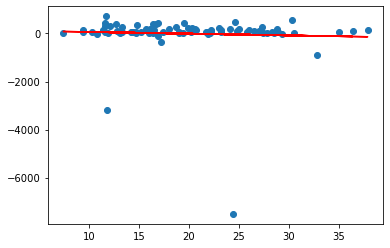

In [20]:
# Plot the Graph of Liner Regression
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

## P/S Branch Analysis

In [21]:
# Use P/S to compare the average

# Get % rate difference between P/S of stock and P/S of industry
PS_rate=(No1_stock_df['P/S_in_Average']-No1_stock_df['P/S'])/No1_stock_df['P/S']

In [22]:

# Use the P/E valuation to get the stock price
PS_valuation_Stock_Price=(1+PS_rate)*No1_stock_df['P/S_in_Average']
PS_valuation_Stock_Price

0     55.602666
1      5.117730
2     30.030414
3      7.320835
4      6.929609
        ...    
84     4.062338
85     8.825536
86     2.673798
87     0.444550
88     1.492219
Length: 89, dtype: float64

In [23]:
# Get Difference bewteen MV Price
Diff_PS=stock_df['Mv Price']-PS_valuation_Stock_Price
Diff_PS

0      -3.982666
1     276.382270
2     128.429586
3     296.779165
4     425.210391
         ...    
84    172.197662
85    128.824464
86    152.056202
87     96.265450
88    109.147781
Length: 89, dtype: float64

In [24]:
# Create Dataframe for P/S valuation, Market value price and difference
ps_df=pd.DataFrame({"Predicted Price": PS_valuation_Stock_Price, "Mv Price": stock_df['Mv Price'], "Difference": Diff_PS,"ESG":Stocks_with_ESG["Total-Score"]})[["Predicted Price", "Mv Price", "Difference","ESG"]]
ps_df.head(10)

,Predicted Price,Mv Price,Difference,ESG
0,55.602666,51.62,-3.982666,16.9
1,5.117730,281.50,276.382270,13.3
2,30.030414,158.46,128.429586,13.3
3,7.320835,304.10,296.779165,27.3
4,6.929609,432.14,425.210391,16.4
5,16.101738,117.38,101.278262,16.3
6,23.115810,117.37,94.254190,12.8
7,7.142570,622.16,615.017430,16.7
8,22.791294,213.98,191.188706,11.8
9,14.260421,465.63,451.369579,24.4


In [25]:
# Delete the nan and inf value
ps_df=ps_df.replace([np.inf, -np.inf], np.nan)
ps_df=ps_df.dropna()
ps_df

,Predicted Price,Mv Price,Difference,ESG
0,55.602666,51.62,-3.982666,16.9
1,5.117730,281.50,276.382270,13.3
2,30.030414,158.46,128.429586,13.3
3,7.320835,304.10,296.779165,27.3
4,6.929609,432.14,425.210391,16.4
...,...,...,...,...
84,4.062338,176.26,172.197662,23.2
85,8.825536,137.65,128.824464,14.3
86,2.673798,154.73,152.056202,22.2
87,0.444550,96.71,96.265450,24.8


In [26]:
# Set X,y for Linear Regression
from sklearn.linear_model import LinearRegression
m =ps_df['ESG'].values.reshape(-1, 1)
n = ps_df['Difference'].values.reshape(-1, 1)

In [27]:
# Create the model
from sklearn.linear_model import LinearRegression
modelmn = LinearRegression()

In [28]:
# fit the model
modelmn.fit(m,n)
print(modelmn)

LinearRegression()


In [29]:
n_pred = modelmn.predict(m)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(y_pred.shape)

(83, 1)


In [30]:
print('Weight coefficients: ', modelmn.coef_)
print('y-axis intercept: ', modelmn.intercept_) 

Weight coefficients:  [[-2.61755081]]
y-axis intercept:  [231.16038458]


In [31]:
y_pred = model.predict(X)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(y_pred.shape)

(83, 1)


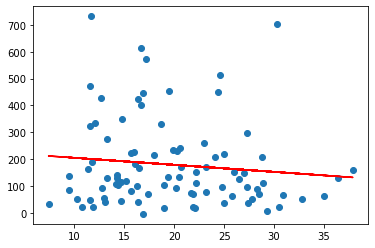

In [32]:
# Plot the Graph of Liner Regression
plt.scatter(m, n)
plt.plot(m, n_pred, color='red')
plt.show()

# Dividend Model

In [33]:
# create the datafram for dividend discount model
div_stock_df=stock_df.filter(['TICKER','longName','beta','industry','dividendRate','revenueGrowth', 'Mv Price'], axis=1)
div_stock_df

,TICKER,longName,beta,industry,dividendRate,revenueGrowth,Mv Price
0,INTC,Intel Corporation,0.545767,Semiconductors,1.46,0.028,51.62
1,NVDA,NVIDIA Corporation,1.366753,Semiconductors,0.16,0.503,281.50
2,QCOM,QUALCOMM Incorporated,1.258366,Semiconductors,2.72,0.300,158.46
3,MSFT,Microsoft Corporation,0.910925,Software—Infrastructure,2.48,0.201,304.10
4,ADBE,Adobe Inc.,1.003041,Software—Infrastructure,0.00,0.200,432.14
...,...,...,...,...,...,...,...
84,ECL,Ecolab Inc.,1.010643,Specialty Chemicals,2.04,0.100,176.26
85,DLR,"Digital Realty Trust, Inc.",0.336122,REIT—Office,4.88,0.009,137.65
86,TT,Trane Technologies plc,1.222857,Specialty Industrial Machinery,2.36,0.064,154.73
87,BBY,"Best Buy Co., Inc.",1.587532,Specialty Retail,2.80,0.005,96.71


In [34]:
# calculate the cost of equity by GPD growth rate 5.7% and Treasury Rate 1.52%

cost_of_equity= div_stock_df['beta']*(0.057-0.0213)+0.0152
cost_of_equity

0     0.034684
1     0.063993
2     0.060124
3     0.047720
4     0.051009
        ...   
84    0.051280
85    0.027200
86    0.058856
87    0.071875
88    0.069909
Name: beta, Length: 89, dtype: float64

In [35]:
div_valuation_Stock_Price=(div_stock_df['Mv Price']*div_stock_df['dividendRate']/100)/(cost_of_equity)
div_de=stock_df['Mv Price']-div_valuation_Stock_Price

In [36]:
div_df=pd.DataFrame({"Predicted Price": div_valuation_Stock_Price, "Mv Price": stock_df['Mv Price'], "Difference": div_de,"ESG":Stocks_with_ESG["Total-Score"]})[["Predicted Price", "Mv Price", "Difference","ESG"]]
div_df

,Predicted Price,Mv Price,Difference,ESG
0,21.729171,51.62,29.890829,16.9
1,7.038261,281.50,274.461739,13.3
2,71.687445,158.46,86.772555,13.3
3,158.040160,304.10,146.059840,27.3
4,0.000000,432.14,432.140000,16.4
...,...,...,...,...
84,70.119094,176.26,106.140906,23.2
85,246.964331,137.65,-109.314331,14.3
86,62.043433,154.73,92.686567,22.2
87,37.674909,96.71,59.035091,24.8


In [37]:
# Delete the nan and inf value
div_df=div_df.replace([np.inf, -np.inf,0], np.nan)
div_df=div_df.dropna()
div_df

,Predicted Price,Mv Price,Difference,ESG
0,21.729171,51.62,29.890829,16.9
1,7.038261,281.50,274.461739,13.3
2,71.687445,158.46,86.772555,13.3
3,158.040160,304.10,146.059840,27.3
9,239.739721,465.63,225.890279,24.4
...,...,...,...,...
84,70.119094,176.26,106.140906,23.2
85,246.964331,137.65,-109.314331,14.3
86,62.043433,154.73,92.686567,22.2
87,37.674909,96.71,59.035091,24.8


In [38]:
# Set w,z for Linear Regression
from sklearn.linear_model import LinearRegression
w =div_df['ESG'].values.reshape(-1, 1)
z = div_df['Difference'].values.reshape(-1, 1)

In [39]:
# Create the model
from sklearn.linear_model import LinearRegression
modelwz = LinearRegression()

In [40]:
# fit the model
modelwz.fit(m,n)
print(modelwz)

LinearRegression()


In [41]:
print('Weight coefficients: ', modelwz.coef_)
print('y-axis intercept: ', modelwz.intercept_) 

Weight coefficients:  [[-2.61755081]]
y-axis intercept:  [231.16038458]


In [42]:
z_pred = model.predict(z)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(z_pred.shape)

(72, 1)


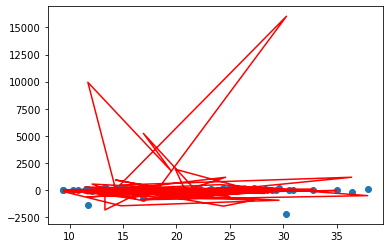

In [45]:
# Plot the Graph of Liner Regression
plt.scatter(w, z)
plt.plot(w, z_pred, color='red')
plt.show()

# Summary




#### Above three methed, P/S is best to test and train to compare other two.

see **PS_Method_Machine_Learning _Model** for test and train